# Visualizations

Here I'll focus mainly on basic visualizations in order to understand my behavior. I'll use elements from calculus and mutivariable calculus in order to understand and get insights from the game.

## Loading the data

In [3]:
import os
import sys 

dir_parent = os.path.dirname(os.getcwd())
sys.path.append(dir_parent + "\\Functions")

from Load_functions import load_file
from Load_functions import read_puuid
from Load_functions import index_puuid_match

In [4]:
# Loading the data from my games in a list in order to use it
matches_list = load_file("matches_riot")

# Loading the data from my games in a list in order to use it
matches_list = load_file("matches_riot")

# Reading my puuid
puuid = read_puuid("puuid.txt")


In [5]:
matches_no_error = [x for x in matches_list if len(x) != 1]

In [5]:
matches_no_error[0]

{'metadata': {'dataVersion': '2',
  'matchId': 'LA1_1302730920',
  'participants': ['qxlqSDd3cWeXvFDpHkCAFJFdm0EbyDCC_In_MoRBLL-imTrXalxGXfaHDxRAOgBbv_ZYjl9CM_i7OQ',
   'yWhGjEZV0Bl0PHcPeq83qvxPpq3z8XSxReKXFRFLmcDv8rJjpTOP_50KdD8WoA6bICCU3DwTvSEqEw',
   'Rv-sbyhiqBZtk1edulpDkZEQK7SuLwlZFsKiSlwRMtWFfcTTudEjhO7ffOYurf9DMsL8Z3YSYDBUHQ',
   'LXg1yNu-dRNYhN97cV4PtMSiiDBDDFS1-OkZCrSiRmswJO-yMO0fH8vb_u5iCZmxSGuY0FFMgHorOA',
   'lQlTdppOiWaCYnvCQ-C-oJyVwunBL9alIxNac3hUYxhwqvpTeLMiNbPjeP_iAT-F3NiiXgoKQ1VjBg',
   'PQmAKY1382rhlWc8Pav5jJe1CT1xAHqglL14PuZdN_sP-5NBTN7WDyHApXgtbFTGVDGT_I5YkLGx_w',
   'WKEk2BHe89tnPeoXJ_xyQYu5HmgG4lr1_410WD1hy2r0nx6Rx1yzAV3N5Nka9xW2sLNUWCIK2TSq2g',
   'aT_dVD_tHe_bg94LWzK74S_U9pCFYPuWad19rjyoMMBimhtvJP_fDQFAHI4BRqR1edp9UTxOkC3NBg',
   'V7L5G7Nj6QQXYLbtk0W2aqVJw34l1zv_Cjs7KnzaV3swspoIQ8CxxE9q-CGDQ-SiPlghTV-H_lLUTg',
   'H1DkpwyWrqj1twgAJXcNQYNra74_IHRyEArZkqwQ4iOQd4nTsnOfabFpLt59CfzATIujiWxe60Dt4A']},
 'info': {'gameCreation': 1663963741645,
  'gameDuration': 2072,
  

In [6]:
# Creación del dataframe con cierta información de los juegos
df = pd.DataFrame()

NameError: name 'pd' is not defined

## KDA - Kills Deaths Assists

This is one of the main metrics used for getting a sense of the performance of a player, in order to understand a little bit about it let's first state what is the equation for the KDA metric:

$$\text{KDA}=\dfrac{\text{Kills + Assists}}{\text{Deaths}}\qquad \Longrightarrow\qquad r_{KDA}=\dfrac{k+a}{d}$$

KDA is a ratio, being $r_{KDA}=\text{KDA}$, $k=\text{Kills}$, $a=\text{Assists}$ and $d=\text{Deaths}$. This means that this ratio is a function:

$$r_{KDA}:\mathbb{R}^{3}\rightarrow\mathbb{R},\qquad r_{KDA}=r_{KDA}(k,a,d)$$

### Domain of KDA ratio

We know that we can't divide by $0$, and we also know that $k$, $a$ and $d$ must be non-negative, so we can define the $KDA$ as a piecewise function:

$$ r_{KDA}=\begin{cases} 
       \dfrac{k+a}{d},& d\neq0 \\
      k+a & d=0
   \end{cases}
$$

so:

$$\text{Dom}(r_{KDA})=\lbrace (k,a,d)\in\mathbb{R}^{3}| k\geq 0,\, a\geq 0,\, d\geq 0\rbrace$$

### Basic visualization

#### Contour lines/ Surface level

Let's plot this graph using gnuplot 

![Basic visualization of KDA vs Kills+Assists and Deaths](./Images/KDA_basic.png)

In order to understand the theoretical behavior of the function $r$ (KDA), let's see how it behaves using the idea of countour lines. The main idea is the following, let's establish what is the level $c$ of our function $r$:

$$r^{-1}(c)=\lbrace (k,a,d)\in \text{Dom}(r)|\, r(k,a,d)=c\rbrace$$

This idea is pretty important, for example let's study what happens for $r(k,a,d)=1$:

$$r(k,a,d)=\dfrac{k+a}{d}=1\quad\Longrightarrow\quad k+a=d$$

so we get that a person has a KDA ratio of $1$ if there $k+a$ is equals to the amounts of times he died. In general we can find that for an arbitrary value $c$ of KDA:

$$r(k,a,d)=\dfrac{k+a}{d}=c\quad\Longrightarrow\quad k+a=cd$$

we could graph this relationship using matplotlib:

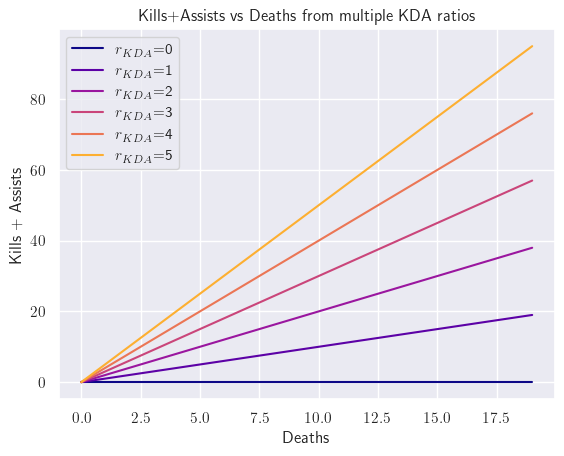

In [2]:
# Loading function to visualize the above equation
from Functions.viz_functions import viz_lines

viz_lines(num_cntr_lines=6)

These curves can be represented at the surface: 

![Basic visualization of KDA vs Kills+Assists and Deaths](./Images/KDA_basic_levels.png)

Now let's take a moment to understand What does it mean? There are multiple things to comment about this.

#### How to achieve a given KDA (if you already died a certain number of times)

Well... mathematically the question can be stated in the following way:

$$r_{KDA}=\dfrac{k+a}{d},\qquad \text{d: constant}$$

## Information from matches